<a href="https://colab.research.google.com/github/navwil/cognorise-infotech-/blob/main/HOUSE_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import all required libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/COGNORISE INFO TECH DATASET/data.csv")
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

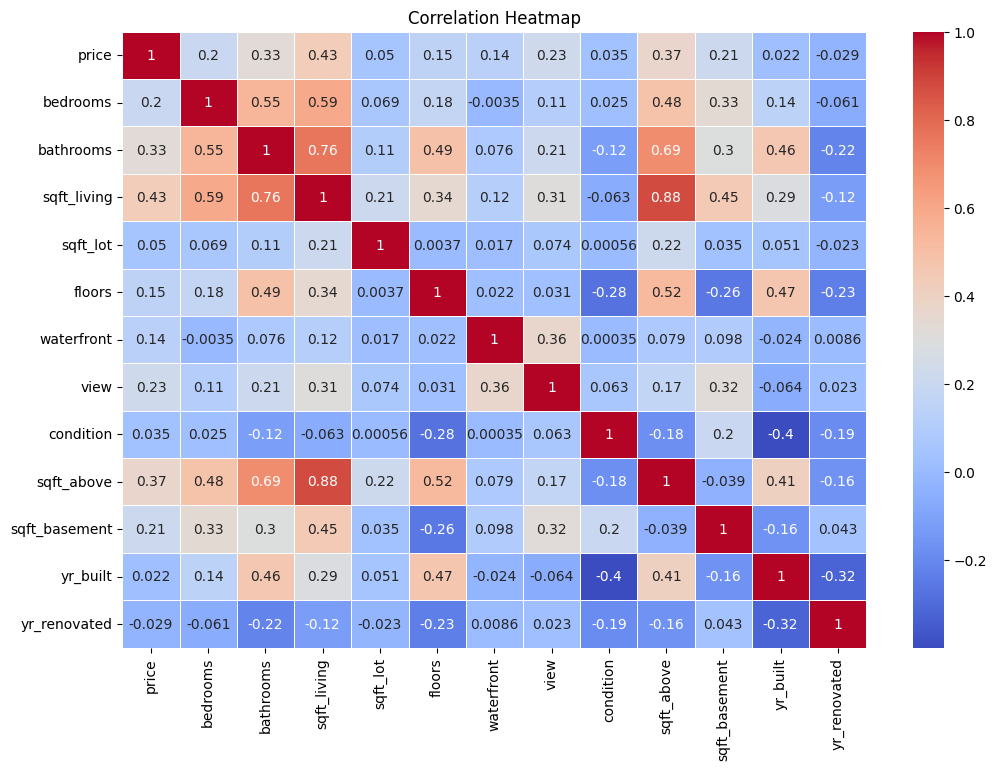

In [ ]:
# Descriptive statistics
desc_stats = df.describe()

numeric_df = df.select_dtypes(include=['float64', 'int64'])
# Correlation analysis
correlation_matrix = numeric_df.corr()

# Plotting correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()




In [ ]:
df.isna().mean()*100

date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
street           0.0
city             0.0
statezip         0.0
country          0.0
dtype: float64

In [ ]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
            'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
target = 'price'

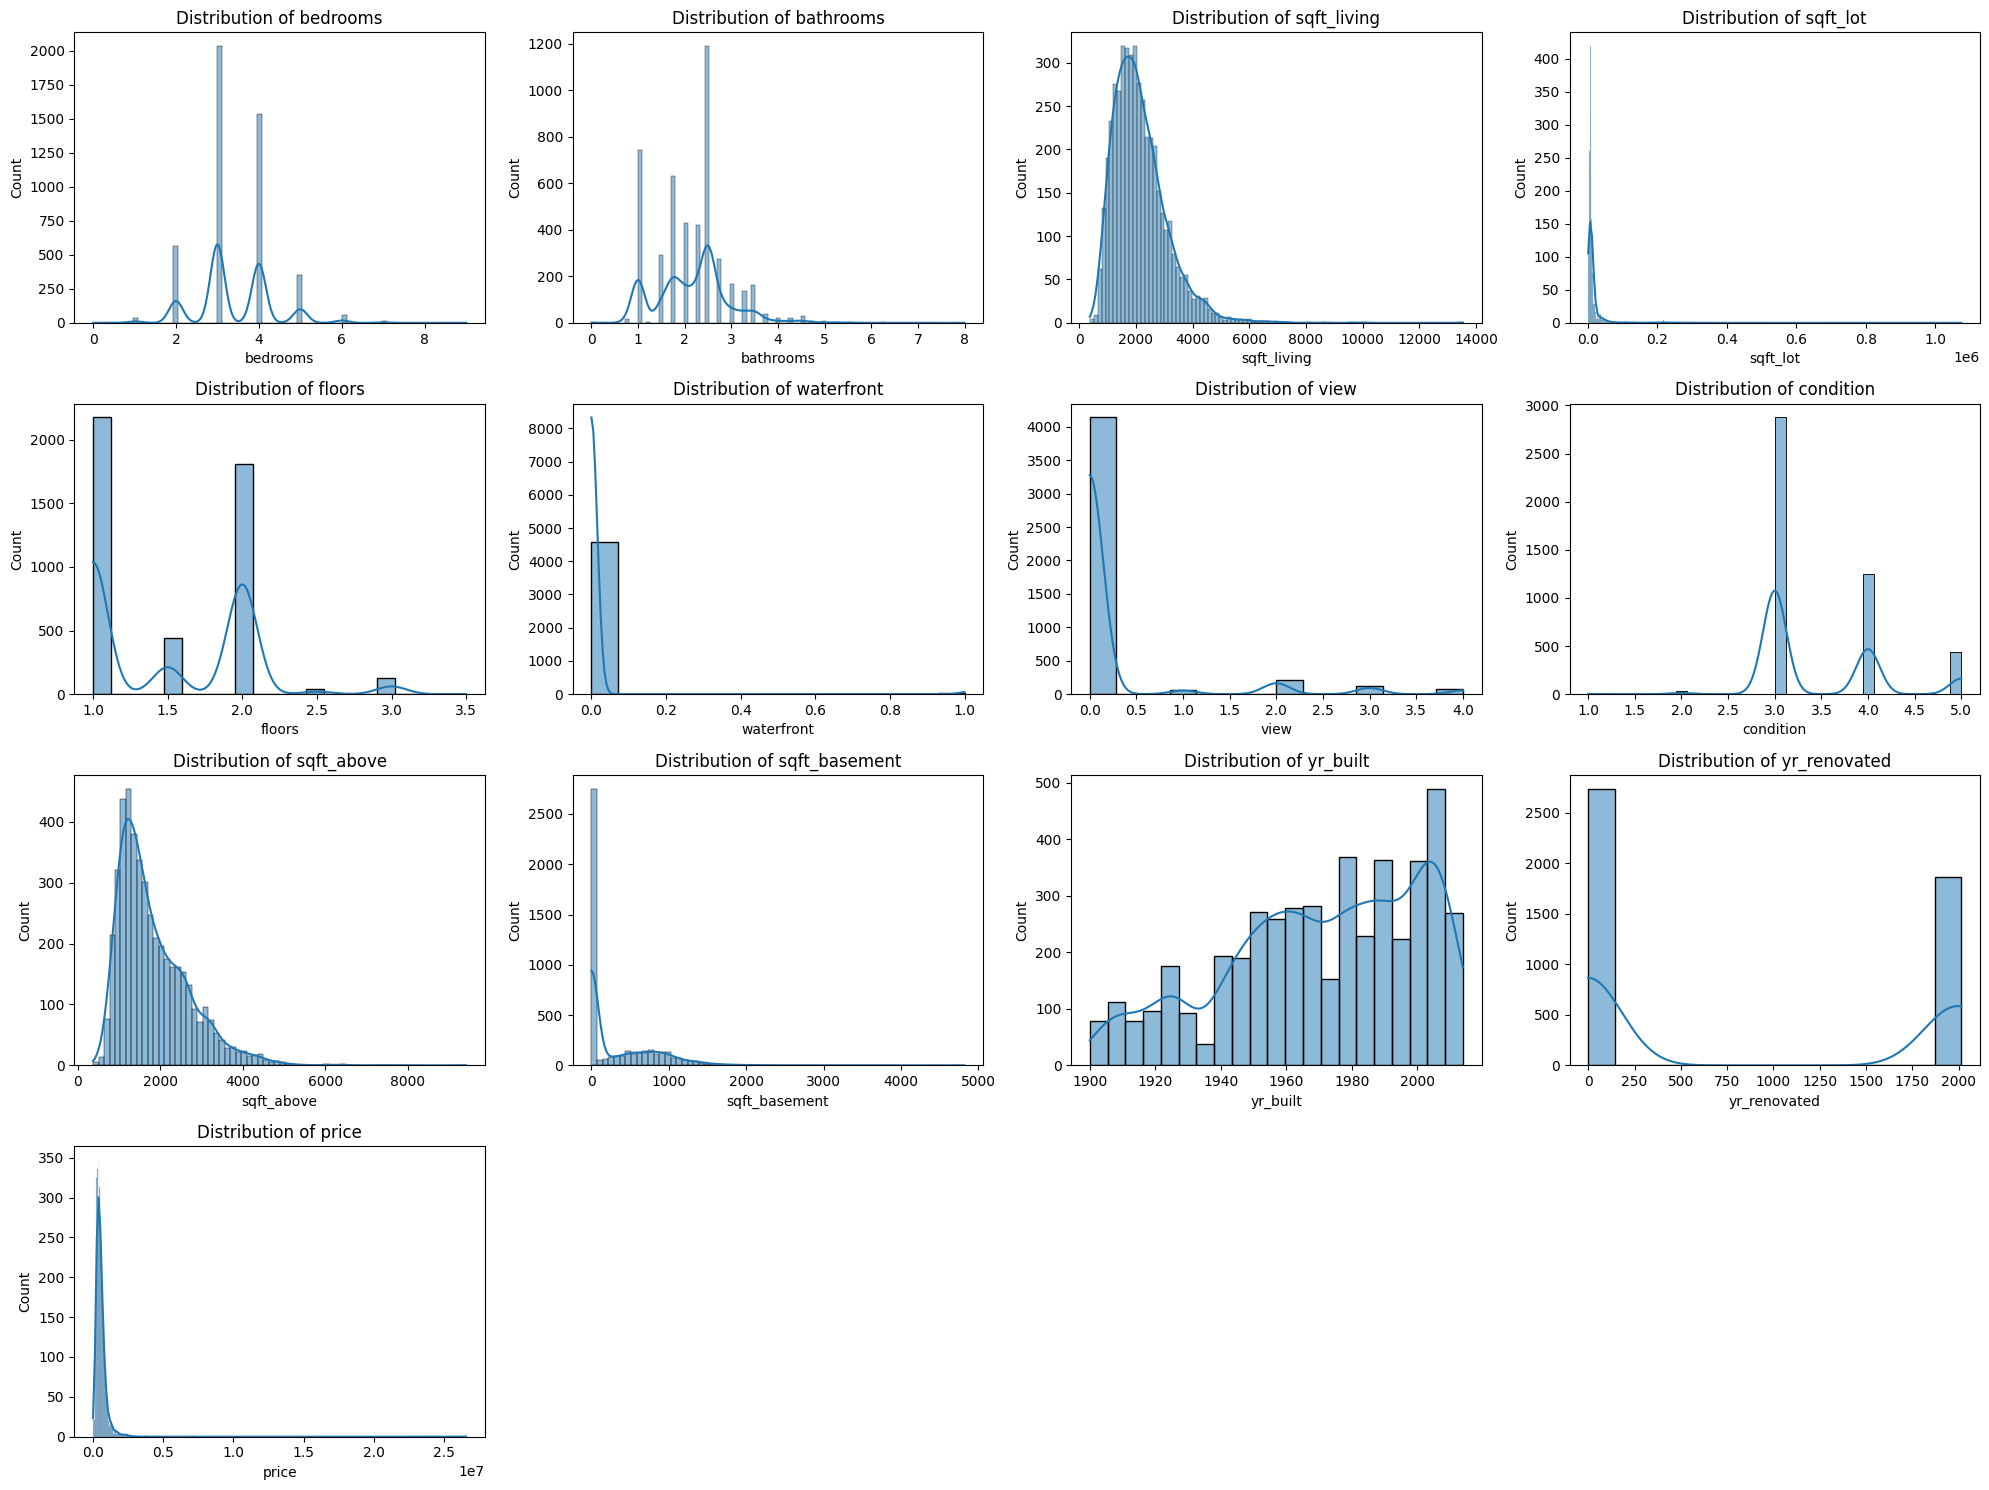

(              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
 count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
 mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
 std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
 min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
 25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
 50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
 75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
 max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   
 
             floors   waterfront         view    condition   sqft_above  \
 count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
 mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
 std       0.538288     0.084404     0.778405     0.677230   862.168977

In [ ]:
# Plotting feature distributions
plt.figure(figsize=(20, 15))
for i, column in enumerate(features + [target], 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

desc_stats, missing_values, correlation_matrix

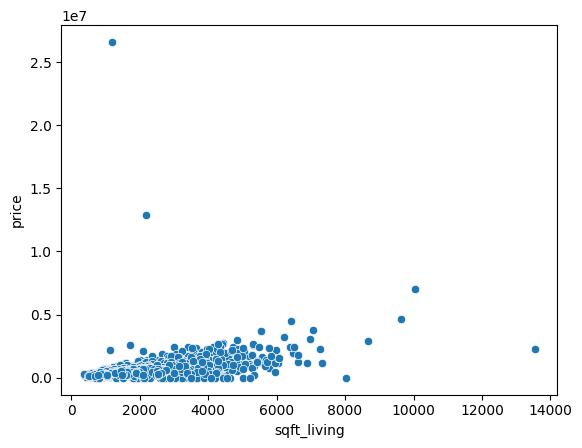

In [ ]:
sns.scatterplot(y='price',x='sqft_living',data=df)
plt.show()

In [ ]:

# Feature Engineering
df['house_age'] = 2024 - df['yr_built']
df['total_sqft'] = df['sqft_above'] + df['sqft_basement']

# Selecting features and target
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
            'condition', 'house_age', 'total_sqft']
target = 'price'

# Dropping rows with missing target values
df = df.dropna(subset=[target])

# Splitting the data into features (X) and target (y)
X = df[features]
y = df[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

In [ ]:
# Tuning parameters for each model
param_grid_rf = {'n_estimators': [50, 100, 150]}
param_grid_gb = {'n_estimators': [50, 100, 150], 'learning_rate': [0.05, 0.1, 0.2]}
param_grid_dt = {'max_depth': [None, 10, 20, 30]}

best_models = {}

for name, model in models.items():
    if name == 'Random Forest Regression':
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
    elif name == 'Gradient Boosting Regressor':
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
    elif name == 'Decision Tree Regression':
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid_dt, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
    else:
        model.fit(X_train, y_train)  # Fit Linear Regression directly
        best_models[name] = model  # Store the fitted LinearRegression object



In [ ]:
# Evaluating best models
results = []

for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append([name, mse, r2])

# Printing results as a table
print(tabulate(results, headers=['Model', 'MSE', 'R2 Score'], tablefmt='pretty'))

+-----------------------------+-------------------+----------------------+
|            Model            |        MSE        |       R2 Score       |
+-----------------------------+-------------------+----------------------+
|      Linear Regression      | 987102629687.8861 |  0.0321065136109393  |
|  Random Forest Regression   | 992823635424.5409 | 0.026496839376910164 |
|  Decision Tree Regression   | 1012860942532.744 | 0.006849460825260167 |
| Gradient Boosting Regressor | 987316593925.326  | 0.031896713144898836 |
+-----------------------------+-------------------+----------------------+


In [ ]:
# save the models

import pickle

for name, model in best_models.items():
  with open(f'{name}.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
# Generate extreme values for each feature
extreme_values = {
    'bedrooms': [0, 10],
    'bathrooms': [0, 5],
    'sqft_living': [100, 10000],
    'sqft_lot': [100, 100000],
    'floors': [1, 4],
    'waterfront': [0, 1],
    'view': [0, 4],
    'condition': [1, 5],
    'house_age': [1, 100],
    'sqft_above' : [50, 5000], # Add sqft_above
    'sqft_basement' : [0, 5000], # Add sqft_basement
    'total_sqft': [100, 10000]
}

# Create a dataframe with extreme values
extreme_df = pd.DataFrame(extreme_values)

# Preprocess extreme values
extreme_df['house_age'] = 2024 - extreme_df['house_age']
# The following line is now valid as 'sqft_above' and 'sqft_basement' exist
extreme_df['total_sqft'] = extreme_df['sqft_above'] + extreme_df['sqft_basement']

# Select features and scale data
X_extreme = extreme_df[features]
X_extreme_scaled = scaler.transform(X_extreme)

# Predict prices for extreme values
for name, model in best_models.items():
    y_pred = model.predict(X_extreme_scaled)
    print(f"Model: {name}")
    print(f"Predicted prices: {y_pred}")

Model: Linear Regression
Predicted prices: [-134740.64250031 4630112.86827094]
Model: Random Forest Regression
Predicted prices: [272643.24 338292.5 ]
Model: Decision Tree Regression
Predicted prices: [247390.91836736 399950.        ]
Model: Gradient Boosting Regressor
Predicted prices: [322391.90253194 826707.54553081]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
